In [16]:
import numpy as np
import keras
from keras.models import Sequential # contains layers
from keras.layers import Dense # in dense every node in one layerr connected to every node in proceeding layer
from keras.optimizers import Adam # adam allows adaptive learning algorithms #Stochastic gradient descent use only 1 sample to calculate gradient
import matplotlib.pyplot as plt
%matplotlib inline

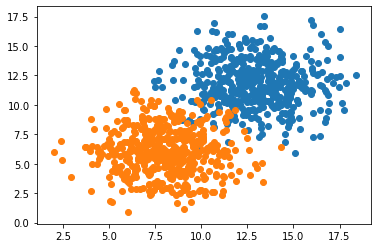

In [17]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [18]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid')) #one output and 2 inputs perceptron
adam = Adam(lr = 0.1)
model.compile(adam,loss='binary_crossentropy',metrics=['accuracy'])
h = model.fit(x=X , y=y, verbose=1, batch_size=50, epochs = 500, shuffle='true') #here our perceptron training starts
# number of epochs should not be too large and too less
#shuffle to avoid stucking in local minima




Epoch 1/500
20/20 [==============================] - 0s 1ms/step - loss: 1.4087 - accuracy: 0.4310
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5910
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.8340
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8670
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.9030
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.9300
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.9440
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2559 - accuracy: 0.9450
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2346 - accuracy: 0.9550
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.9570
Epoch 11/

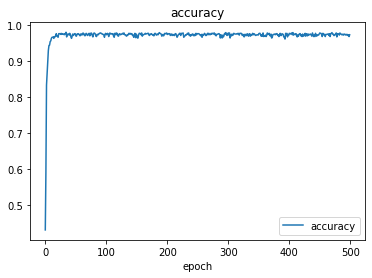

In [20]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])


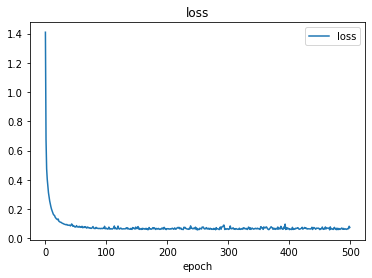

In [21]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [27]:
def plot_decision_boundary(X, y, model):# X=data y=label matrix
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    # 50 equally spaced points
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span) # broadcasting conveting each xx and yy to 50X50 matrix respectively
    xx_, yy_ = xx.ravel(), yy.ravel() # converts each to 1D array
    grid = np.c_[xx_, yy_] #columnwise concat the arrays
    pred_func = model.predict(grid) # test all points in the grid
    z = pred_func.reshape(xx.shape) #shape as xx or yy anyone
    plt.contourf(xx, yy, z)# z is magnitude of probability of each coordinate xx,yy
    

prediction is:  [[0.9999794]]


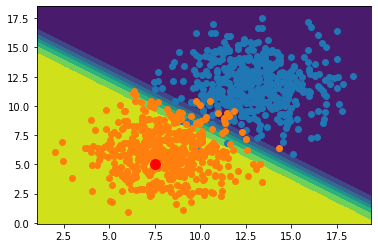

In [29]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)